In [1]:
!pip install --upgrade scikit-learn

In [2]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [3]:
#IMPORT LIBRARIES
import numpy as np #Data Preprocessing Library
import pandas as pd
import matplotlib.pyplot as plt #Data Visualization Library
plt.style.use('seaborn')
import random
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import (StandardScaler,
                                   power_transform,
                                   FunctionTransformer)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
%matplotlib inline

In [4]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [5]:
#LOADING THE DATASET
uk = pd.read_csv('Train_data.csv')
uk_test = pd.read_csv('Test_data.csv')
nRow, nCol = uk.shape
print(f'There are {nRow} rows and {nCol} columns in the table')

There are 25192 rows and 42 columns in the table


In [6]:
uk.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
#This shows the data type of each column
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [8]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(uk)
label_encoding(uk_test)

uk.drop(['num_outbound_cmds'], axis=1, inplace=True)
uk_test.drop(['num_outbound_cmds'], axis=1, inplace=True)
     
uk.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [9]:
from sklearn.model_selection import train_test_split

# Assuming 'uk' is your DataFrame and 'class' is the target variable
X = uk.drop('class', axis=1)  # Features (all columns except 'class')
y = uk['class']  # Target variable

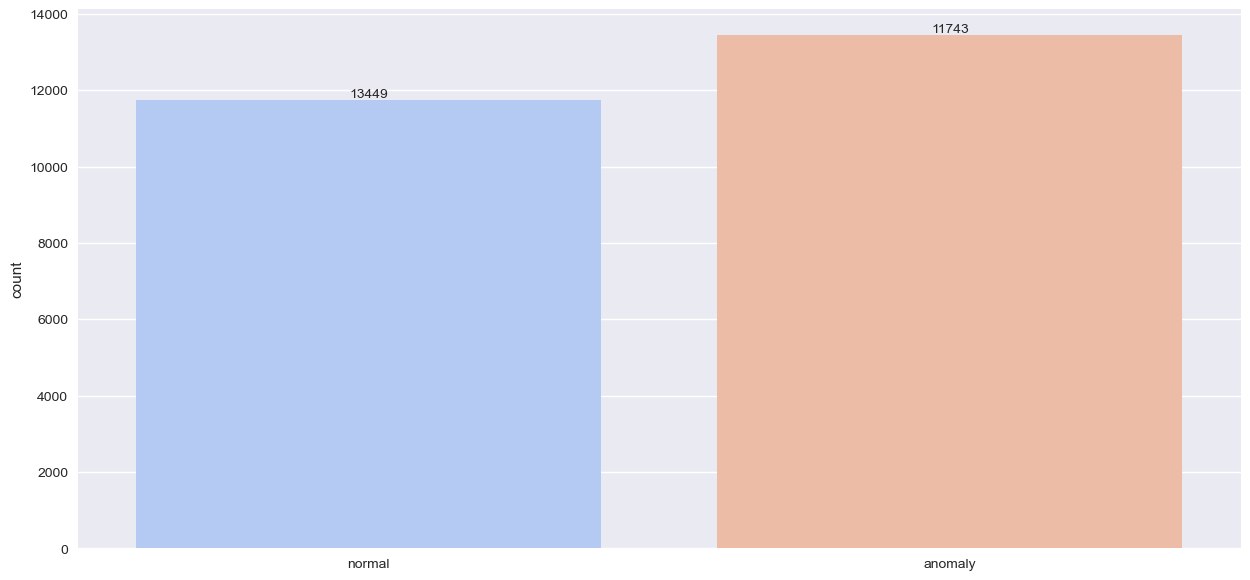

In [10]:
#Visualizing the Target Variable
ax = sns.countplot(x=uk["class"], palette=("coolwarm"))
abs_values = uk["class"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['normal', 'anomaly'])

plt.xlabel(None)
plt.show()

In [11]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,1,19,9,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,1,46,1,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,1,38,5,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [12]:
y

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, Length: 25192, dtype: int32

In [13]:
#Feature selection using the Recursive Feature Elimination (RFE) algorithm with a Random Forest Classifier as the estimator

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools

rf = RandomForestClassifier()

rfe = RFE(rf, n_features_to_select=10)
rfe = rfe.fit(X, y)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate']

In [32]:
X = X[selected_features]

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
youkay = pd.concat([X_train, y_train], axis=1)
# Save the train data to a CSV file
youkay.to_csv('youkay.csv', index=False)

In [16]:
#X_train.to_csv('uk1.csv', index=False)

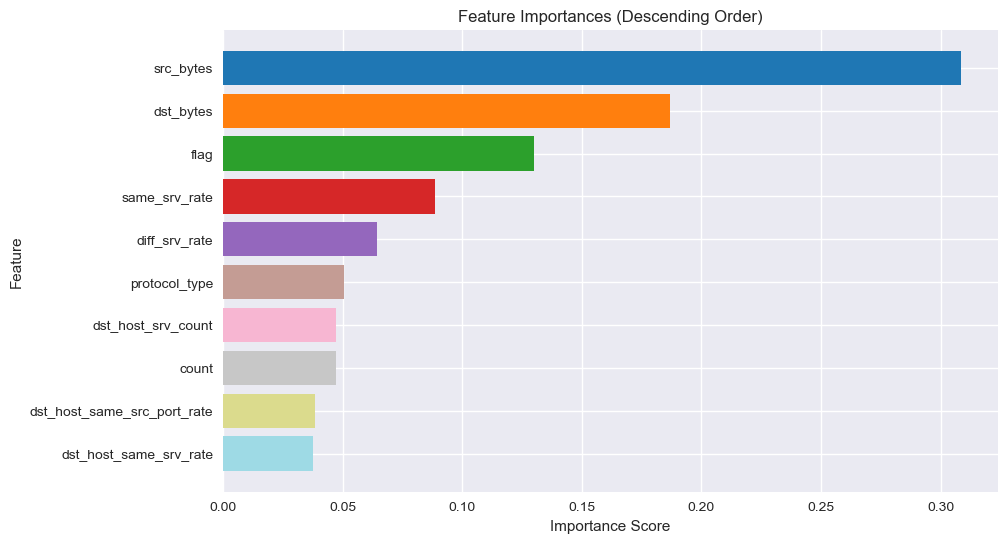

In [17]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort the selected features based on their importance scores
sorted_features = sorted(zip(selected_features, importances), key=lambda x: x[1], reverse=True)

# Extract the feature names and importance scores
feature_names = [x[0] for x in sorted_features]
importance_values = [x[1] for x in sorted_features]

# Generate a unique color for each feature name
colors = plt.cm.tab20(np.linspace(0, 1, len(feature_names)))

# Plot the features in descending order
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importance_values, align='center', color=colors)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances (Descending Order)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [18]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [19]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [20]:
def objective(trial):
    # Define hyperparameters for Random Forest Classifier
    rfc_params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
    }

    # Initialize Random Forest Classifier with hyperparameters
    rfc = RandomForestClassifier(**rfc_params)

    # Train the model
    rfc.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and accuracy
print('Best hyperparameters: ', study.best_params)
print('Best accuracy: ', study.best_value)

# Train the model with the best hyperparameters
best_rfc = RandomForestClassifier(**study.best_params)
best_rfc.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Best model accuracy: ', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Best hyperparameters:  {'n_estimators': 54, 'max_depth': 22, 'min_samples_split': 3}
Best accuracy:  0.997618417570786
Best model accuracy:  0.997221487165917
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3516
           1       1.00      1.00      1.00      4042

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558

Confusion Matrix:
[[3504   12]
 [   9 4033]]


In [21]:
# Create a Random Forest classifier
rfc_classifier = RandomForestClassifier(**{k: v for k, v in study.best_params.items() if k in ['n_estimators', 'max_depth', 'min_samples_split', 'criterion']})
 
# Train the classifier
rfc_classifier.fit(X_train, y_train)
 
# Make predictions on the test data
predictions = rfc_classifier.predict(X_test)
 
# Use the predict_proba method to get probabilities
probabilities = rfc_classifier.predict_proba(X_test)
 
# Define a threshold for anomaly detection (e.g., 0.5 for binary classification)
# Instances with probabilities below the threshold can be considered anomalies
threshold = 0.5
 
# Identify anomalies using predictions
anomalies_pred = X_test[predictions == 1]  # Instances predicted as anomalies
 
# Identify anomalies using probabilities
anomalies_prob = X_test[np.max(probabilities, axis=1) < threshold]  # Instances with probabilities below the threshold
 
# Print the number of anomalies identified using each method
print("Number of anomalies identified using predictions:", len(anomalies_pred))
print("Number of anomalies identified using probabilities:", len(anomalies_prob))

Number of anomalies identified using predictions: 4046
Number of anomalies identified using probabilities: 0


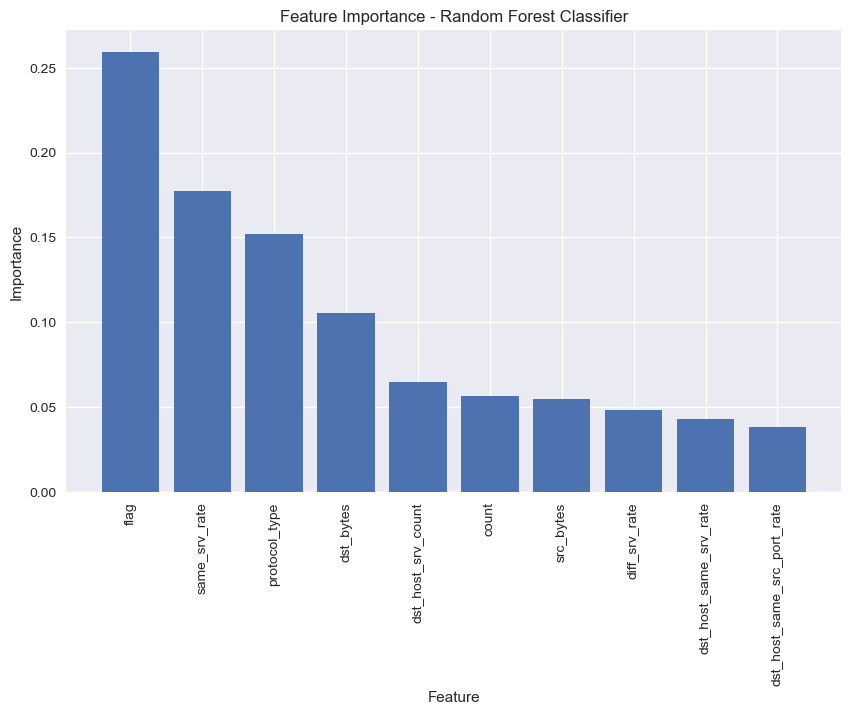

In [22]:
# Train the model with the best hyperparameters
best_rfc = RandomForestClassifier(**study.best_params)
best_rfc.fit(X_train, y_train)

# Get feature importances
feature_importances = best_rfc.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest Classifier')
plt.show()

In [31]:
from joblib import dump
rfc_classifier = RandomForestClassifier(**{k: v for k, v in study.best_params.items() if k in ['n_estimators', 'max_depth', 'min_samples_split', 'criterion']})
best_rfc = RandomForestClassifier(**study.best_params)
best_rfc.fit(X_train, y_train)
# Save the model
dump(best_rfc, 'uk.joblib')

['uk.joblib']

In [24]:
#import pickle

In [25]:
#pickle_out = open("uk.pkl", "wb")
#pickle.dump(rfc_classifier, pickle_out)
#pickle_out.close()